In [1]:
%matplotlib inline

## [Random Projection](https://scikit-learn.org/stable/modules/random_projection.html) 
- Reduces data dimensionality by trading accuracy/variance for faster processing & smaller model sizes.
- Two types of unstructured random matrices are supported:
    - [Gaussian random matrix](https://scikit-learn.org/stable/modules/random_projection.html#gaussian-random-matrix)
    - [Sparse random matrix](https://scikit-learn.org/stable/modules/random_projection.html#sparse-random-matrix)
- Random project matrix dimensions & distributions are controlled to *preserve pairwise distances* between any two samples in the dataset.  

## [Johnson-Lindenstrauss lemma](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.johnson_lindenstrauss_min_dim.html#sklearn.random_projection.johnson_lindenstrauss_min_dim)
- A small set of high-D points can be embedded into a low-D space such that the distances between the points are *nearly* preserved.
- The scikit algorithm estimates the minimal random subspace size needed to guarantee a bounded distortion introduced by the random projection.

In [2]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

print(johnson_lindenstrauss_min_dim(n_samples=1e6, 
                                    eps=0.5))

print(johnson_lindenstrauss_min_dim(n_samples=1e6, 
                                    eps=[0.5, 0.1, 0.01]))

print(johnson_lindenstrauss_min_dim(n_samples=[1e4, 1e5, 1e6], 
                                    eps=0.1))

663
[    663   11841 1112658]
[ 7894  9868 11841]


## [Example](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_johnson_lindenstrauss_bound.html#sphx-glr-auto-examples-miscellaneous-plot-johnson-lindenstrauss-bound-py)

In [3]:
import sys
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

- 1st plot: as ```n_samples``` increases, the minimal number of dimensions (```n_components```) increases logarithmically in order to guarantee the embedding.

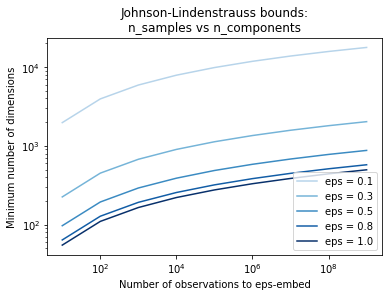

In [4]:
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")
plt.show()

- 2nd plot: as admissable distortion (```eps```) increases, the minimum number of dimensions (```n_components```) decreases drastically for a given number of samples (```n_samples```).

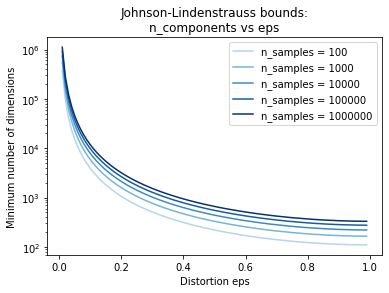

In [5]:
# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()
for n_samples, color in zip(n_samples_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples, eps=eps_range)
    plt.semilogy(eps_range, min_n_components, color=color)

plt.legend(["n_samples = %d" % n for n in n_samples_range], loc="upper right")
plt.xlabel("Distortion eps")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_components vs eps")
plt.show()

## [Gaussian Random Projection](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html#sklearn.random_projection.GaussianRandomProjection)
- Reduces dimensionality by projecting input space on a randomly generated matrix with components drawn from $N(0, \frac{1}{n_{components}})$.

In [6]:
import numpy as np
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)

## [Sparse Random Projection](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html#sklearn.random_projection.SparseRandomProjection)
- Reduces dimensionality by projecting input space on a sparse random matrix.
- Sparse random matrices are an alternative to dense Gaussians that guaranteeds similar embedding quality and being much more memory-efficient and faster to compute.
- Given ```s = 1/density```, random matrix elements are drawn from $\begin{split}\left\{
\begin{array}{c c l}
-\sqrt{\frac{s}{n_{\text{components}}}} & & 1 / 2s\\
0 &\text{with probability}  & 1 - 1 / s \\
+\sqrt{\frac{s}{n_{\text{components}}}} & & 1 / 2s\\
\end{array}
\right.\end{split}$

where n_components is the size of the projected subspace.

In [7]:
import numpy as np
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.SparseRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)